In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [85]:
N_samples = 25
max_range = 3
xs, ys = np.meshgrid(np.linspace(-max_range, max_range, N_samples), np.linspace(-max_range, max_range, N_samples))
eigenval = -0.3
A = np.array([[eigenval, 1], [0, eigenval]])
us, vs = A @ np.array([xs.flatten(), ys.flatten()])
us = us.reshape(xs.shape)
vs = vs.reshape(ys.shape)

In [108]:
num_trajectories = 10
num_timepoints = 200
dt = 0.05
np.random.seed(11)

xs_init = np.random.uniform(-max_range, max_range, size=num_trajectories)
ys_init = np.random.uniform(-max_range, max_range, size=num_trajectories)

xs_init = np.concatenate((xs_init, [1.1, 1.1]))
ys_init = np.concatenate((ys_init, [0.2, 0.8]))

trajectories = []
for x0, y0 in zip(xs_init, ys_init):
    trajectory = [np.array([x0, y0])]
    for _ in range(num_timepoints):
        speed = A @ trajectory[-1]
        trajectory.append(trajectory[-1] + speed * dt)
    trajectories.append(np.array(trajectory))

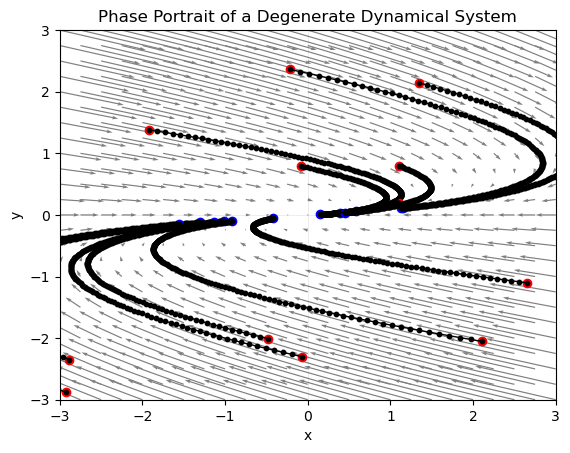

In [109]:
plt.quiver(xs, ys, us, vs, color='grey', scale=25 * np.abs(eigenval) * max_range)
plt.xlim(-max_range, max_range)
plt.ylim(-max_range, max_range)
for traj in trajectories:
    plt.scatter(traj[0, 0], traj[0, 1], color='red')  # Starting point
    plt.scatter(traj[-1, 0], traj[-1, 1], color='blue')  # Ending point
    plt.plot(traj[:, 0], traj[:, 1], lw=1, color='k')
    plt.scatter(traj[:, 0], traj[:, 1], s=10, c='k')
plt.axhline(0, color='black', lw=0.5, alpha=0.1)
plt.axvline(0, color='black', lw=0.5, alpha=0.1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase Portrait of a Degenerate Dynamical System')
plt.show()

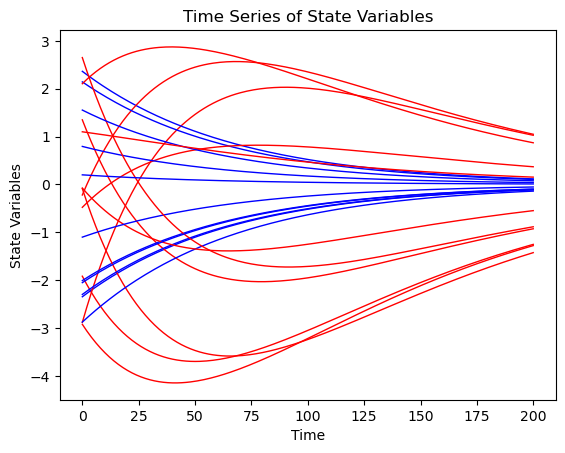

In [84]:
for traj in trajectories:
    plt.plot(traj[:, 0], lw=1, color='red')
    plt.plot(traj[:, 1], lw=1, color='blue')
plt.xlabel('Time')
plt.ylabel('State Variables')
plt.title('Time Series of State Variables')
plt.show()